#  Restaurant Food Cost

# Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

# Dataset Attributes

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
RESTAURANT_ID: A unique ID for each restaurant.
CUISINES: The variety of cuisines that the restaurant offers.
TIME: The open hours of the restaurant.
CITY: The city in which the restaurant is located.
LOCALITY: The locality of the restaurant.
RATING: The average rating of the restaurant by customers.
VOTES: The overall votes received by the restaurant.
COST: The average cost of a two-person meal.

# Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Restaurant%20Food%20Cost

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx


In [1]:
 # lets start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import  confusion_matrix,classification_report,accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# read csv file and convert intp data frame
dftrain=pd.read_excel('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Restaurant%20Food%20Cost/Data_Train.xlsx')
dftrain.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
# read csv file and convert intp data frame
dftest=pd.read_excel('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Restaurant%20Food%20Cost/Data_Test.xlsx')
dftest.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [4]:
dftrain.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [5]:
dftrain.shape

(12690, 9)

In [6]:
dftrain=dftrain.dropna()

In [7]:
dftrain.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [8]:
dftrain.shape

(10593, 9)

In [9]:
dftest.isnull().sum()

TITLE            284
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [10]:
dftest=dftest.dropna()

In [11]:
dftest.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [12]:
dftest

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.7,36 votes
...,...,...,...,...,...,...,...,...
4224,QUICK BITES,331,"Kerala, South Indian","12noon – 4pm, 7pm – 10:30pm (Mon-Sat),12noon –...",Bangalore,Indiranagar,3.8,410 votes
4225,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,197 votes
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes


In [13]:
dftrain.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


categorical_cols = ['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES']

# Create a LabelEncoder object
le = LabelEncoder()

# Loop through the categorical columns and encode them
for col in categorical_cols:
    dftrain[col] = le.fit_transform(dftrain[col])




In [15]:
dftrain

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,29,5997,2360,656,267,249,16,1267,1200
1,31,8439,262,1682,55,895,22,939,1500
2,29,6951,2680,584,55,947,18,704,800
3,92,4058,3733,238,187,117,21,778,800
4,48,9849,1596,543,187,535,18,464,300
...,...,...,...,...,...,...,...,...,...
12685,92,8459,2640,1020,114,297,18,1338,500
12686,31,6158,1938,1051,187,114,23,190,1800
12687,69,7101,1884,1013,199,1158,20,1417,1300
12688,29,3922,3163,1641,55,544,15,985,400


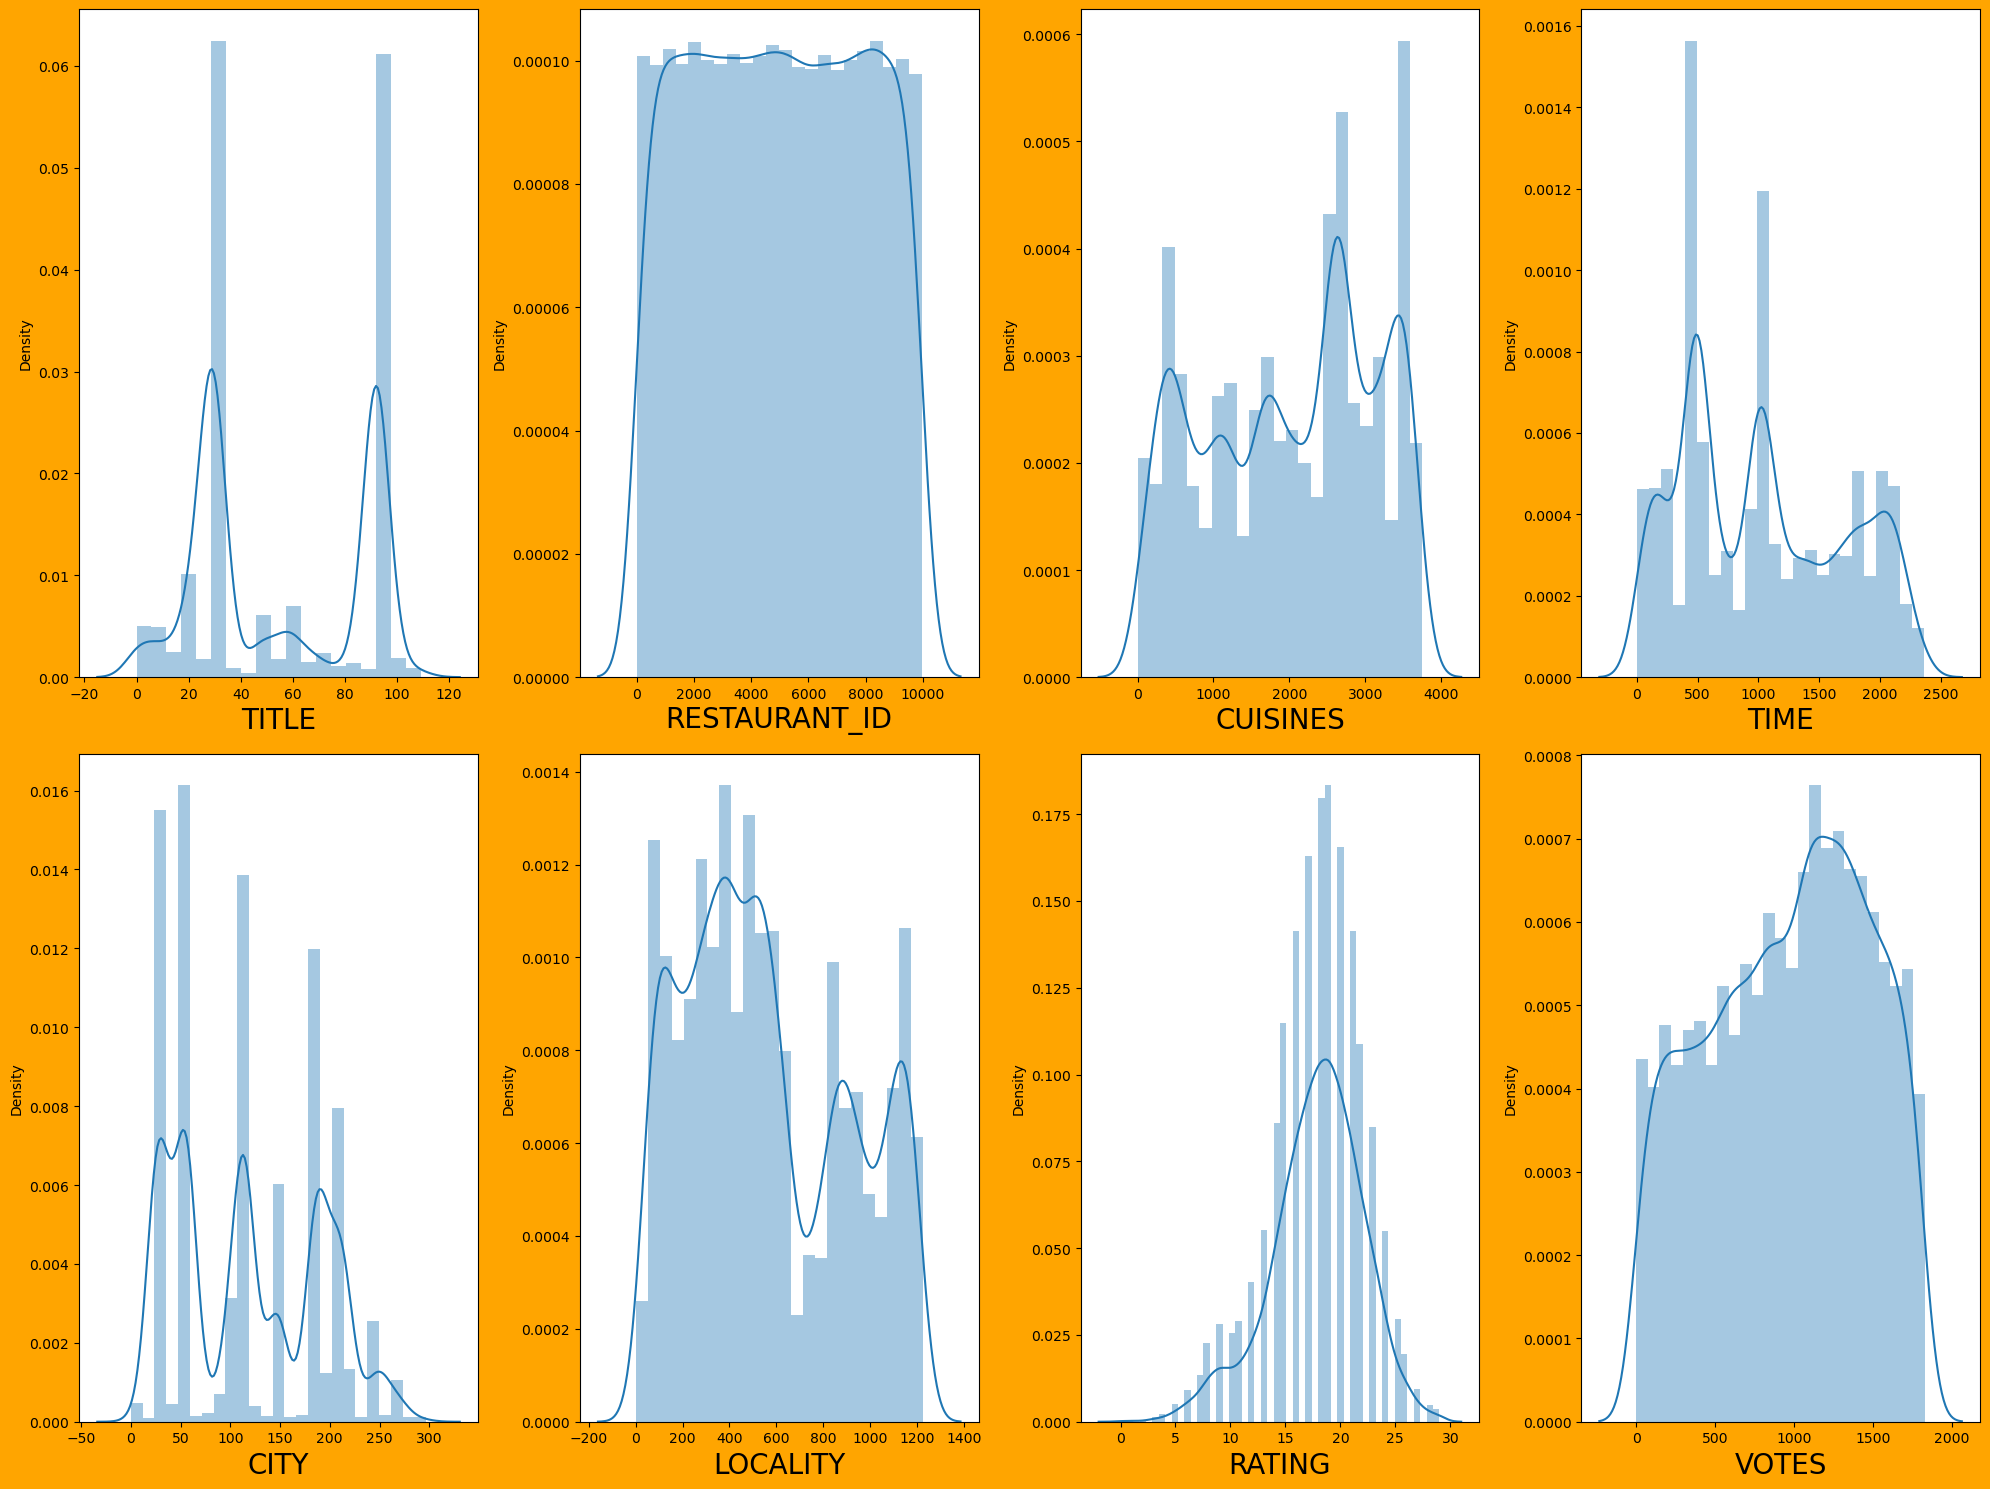

In [16]:
# lets see how data is distributed from every column
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber=1

for column in dftrain:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(dftrain[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


i dont find any outlier or noise the feature

# let check the relationship of the features

In [17]:
# divide data set into feature and label
y=dftrain['COST']
X=dftrain.drop(columns=['COST'])

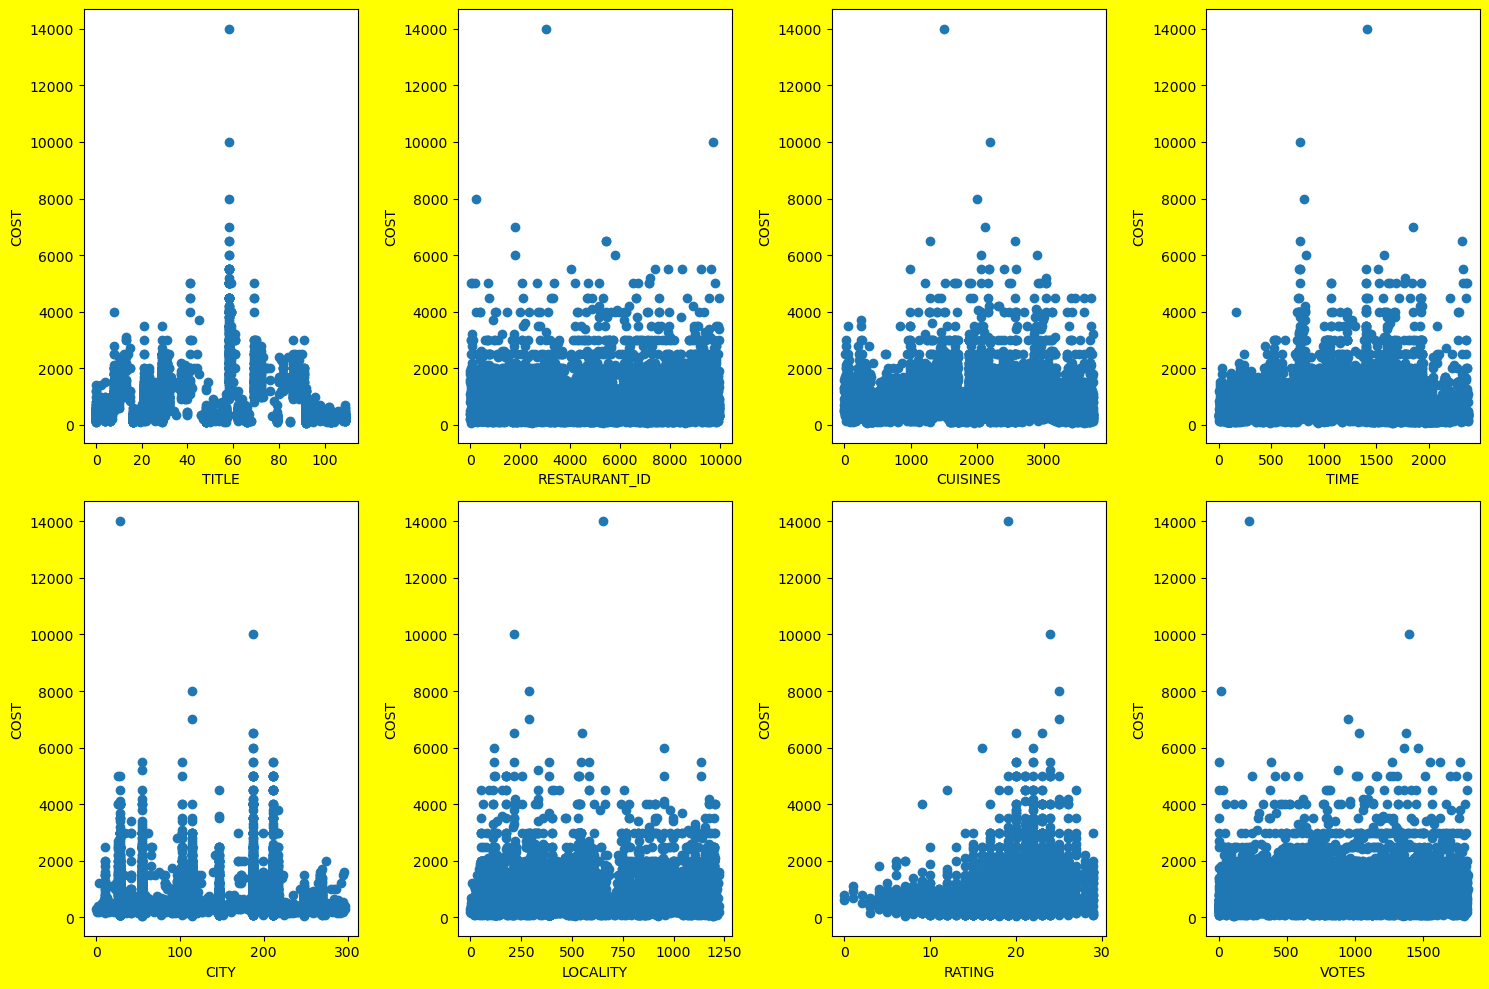

In [18]:
# visualizing relationship
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1

for column in X:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('COST',fontsize=10)
    plotnumber+=1
plt.tight_layout()

# i dont find any relationship between each other

TITLE               Axes(0.125,0.653529;0.227941x0.226471)
RESTAURANT_ID    Axes(0.398529,0.653529;0.227941x0.226471)
CUISINES         Axes(0.672059,0.653529;0.227941x0.226471)
TIME                Axes(0.125,0.381765;0.227941x0.226471)
CITY             Axes(0.398529,0.381765;0.227941x0.226471)
LOCALITY         Axes(0.672059,0.381765;0.227941x0.226471)
RATING                  Axes(0.125,0.11;0.227941x0.226471)
VOTES                Axes(0.398529,0.11;0.227941x0.226471)
COST                 Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

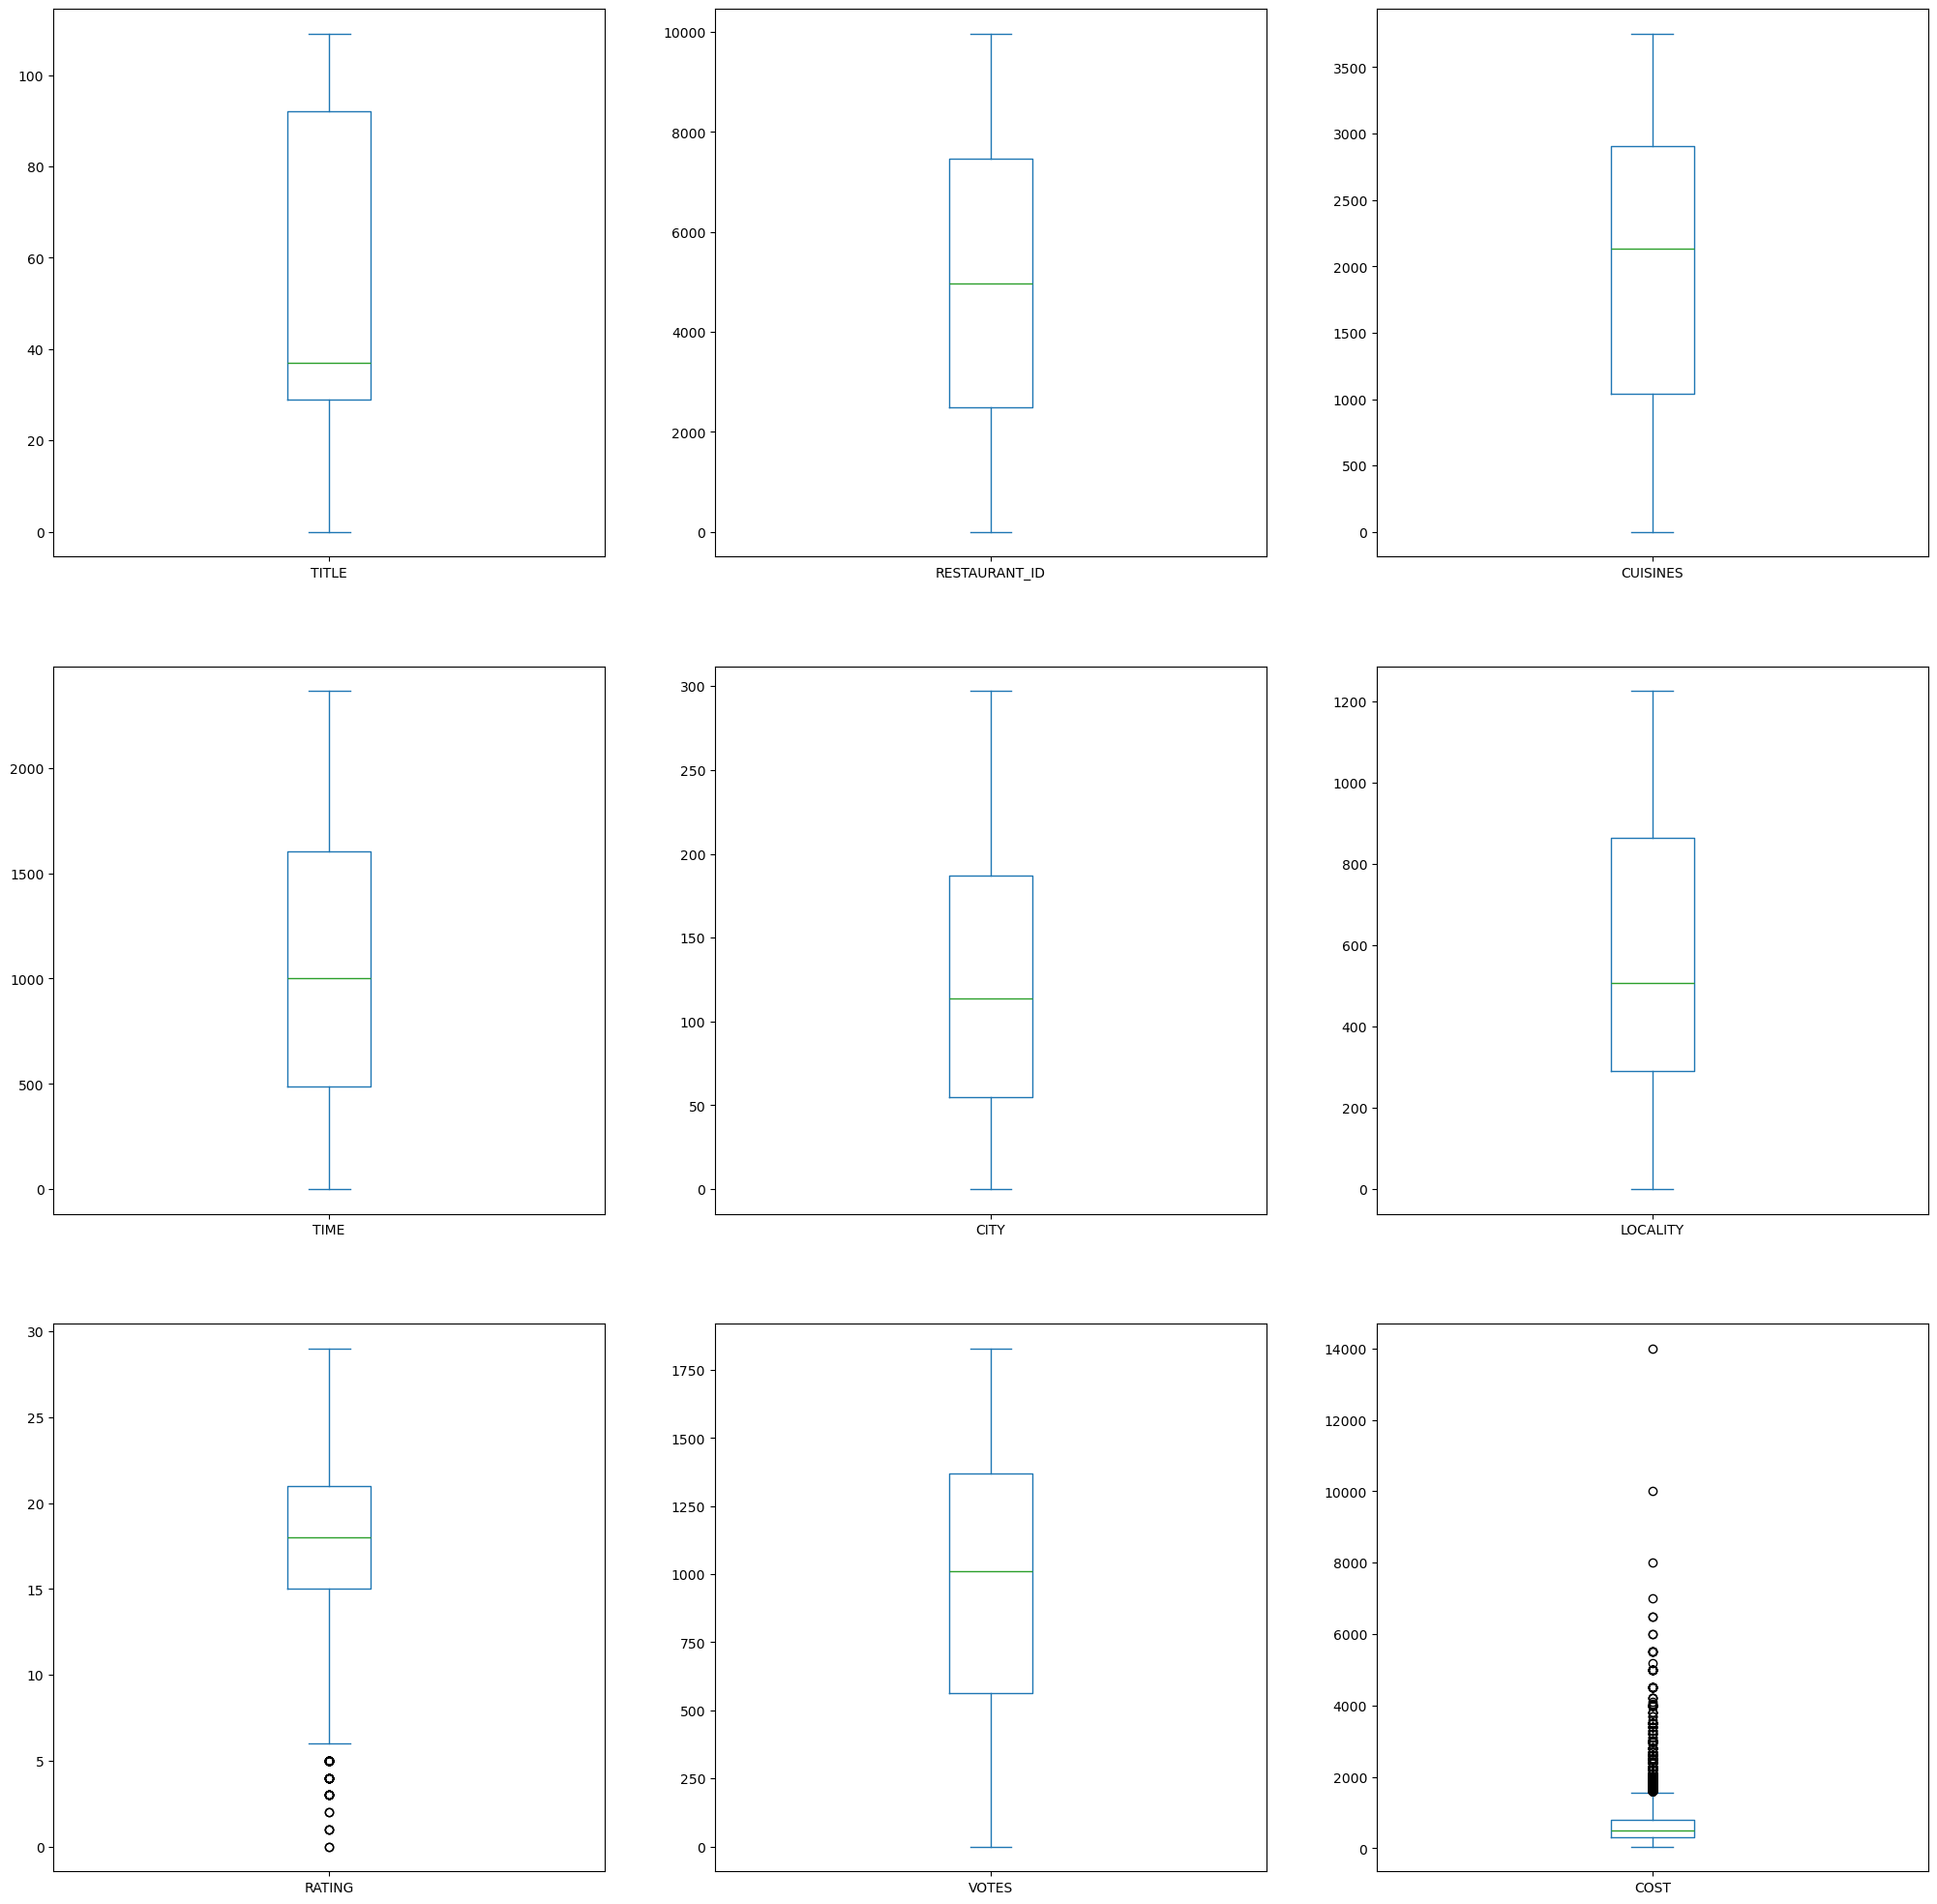

In [19]:
dftrain.plot(kind='box',subplots=True,layout=(3,3),figsize=(25,25),sharex=False)

In [20]:
dftrain.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [21]:
# Define a function to handle outlier removal for multiple columns
def remove_outliers(dftrain, column):
    q1 = dftrain[column].quantile(0.25)
    q3 = dftrain[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower and upper limits for outliers
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    
    # Find indices of outliers
    index = np.where((dftrain[column] < low_limit) | (dftrain[column] > high_limit))
    
    # Drop rows with outliers
    dftrain = dftrain.drop(dftrain.index[index])
    
    return dftrain

# List of columns to handle outliers
columns_to_check = ['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES']  # Add more columns as needed

# Loop through each column and remove outliers
for col in columns_to_check:
    dftrain= remove_outliers(dftrain, col)

# Check the shape of the updated 'data' after removing outliers
data_shape = dftrain.shape

# Reset index of the 'data' dataframe
dftrain.reset_index(drop=True, inplace=True)


TITLE               Axes(0.125,0.653529;0.227941x0.226471)
RESTAURANT_ID    Axes(0.398529,0.653529;0.227941x0.226471)
CUISINES         Axes(0.672059,0.653529;0.227941x0.226471)
TIME                Axes(0.125,0.381765;0.227941x0.226471)
CITY             Axes(0.398529,0.381765;0.227941x0.226471)
LOCALITY         Axes(0.672059,0.381765;0.227941x0.226471)
RATING                  Axes(0.125,0.11;0.227941x0.226471)
VOTES                Axes(0.398529,0.11;0.227941x0.226471)
COST                 Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

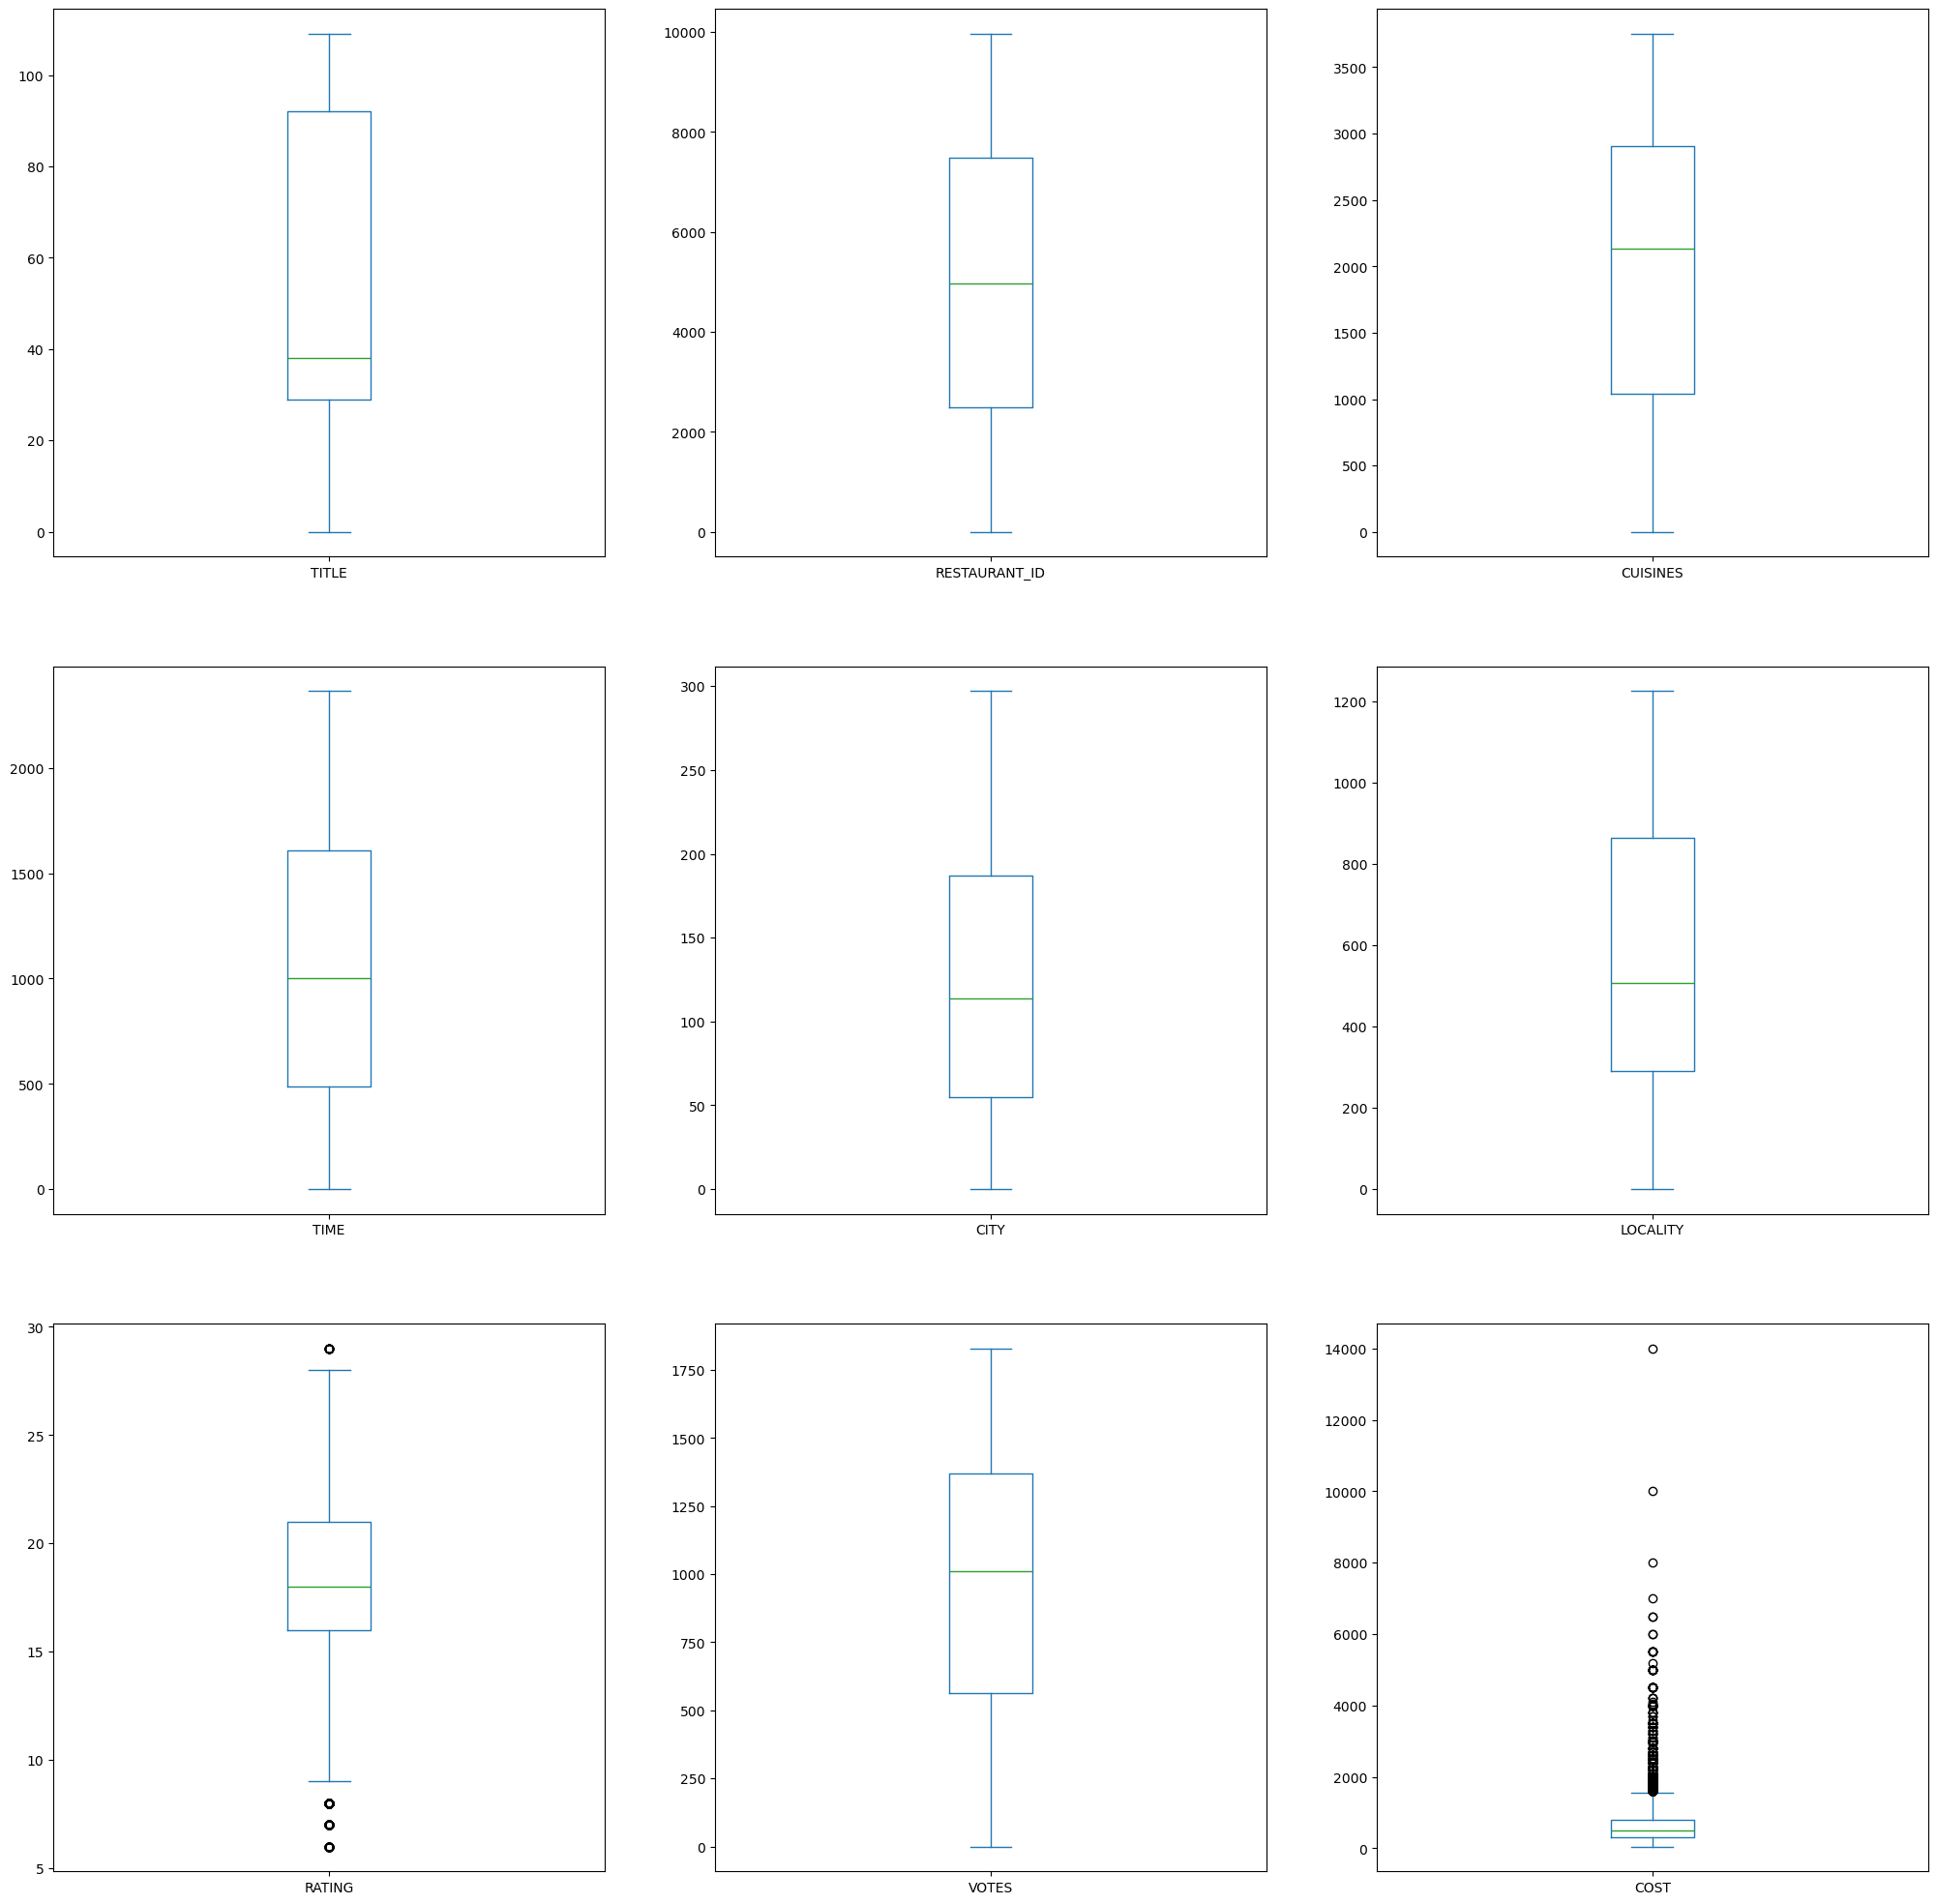

In [22]:
dftrain.plot(kind='box',subplots=True,layout=(3,3),figsize=(25,25),sharex=False)

In [23]:
# data scaling formula Z=(X-mean)/std
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.79344277,  0.35691275,  0.32334124, ..., -0.91170828,
        -0.4355221 ,  0.60965143],
       [-0.73106845,  1.20701169, -1.5994196 , ...,  0.97040206,
         0.98379357, -0.04600943],
       [-0.79344277,  0.68901528,  0.61661267, ...,  1.1219032 ,
         0.03758313, -0.51576645],
       ...,
       [ 0.45404358,  0.74123266, -0.11290002, ...,  1.73664821,
         0.51068835,  0.90949634],
       [-0.79344277, -0.36542767,  1.05926924, ..., -0.05223065,
        -0.67207471,  0.04594301],
       [-0.79344277, -0.29928566,  0.59003495, ...,  1.71042686,
        -0.90862732,  1.06341672]])

In [24]:


# Check for columns with inconsistent number of samples
inconsistent_cols = []
sample_counts = dftrain.count()
for col, count in sample_counts.items():
    if count != sample_counts.iloc[0]:
        inconsistent_cols.append(col)

# Drop rows with missing values in the inconsistent columns
dftrain = dftrain.dropna(subset=inconsistent_cols)




In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Prepare the data
X = dftrain.drop(['COST'], axis=1)
y = dftrain['COST']
X_scaled = StandardScaler().fit_transform(X)
X_test = StandardScaler().fit_transform(dftrain.drop(['COST'], axis=1))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Now you can use X_train, X_test, y_train, y_test for your model training and evaluation


In [26]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

# lets check how model is fixed in trained data

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


categorical_cols = ['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES']

# Create a LabelEncoder object
le = LabelEncoder()

# Loop through the categorical columns and encode them
for col in categorical_cols:
    dftest[col] = le.fit_transform(dftest[col])




In [28]:
y_pred=regression.predict(dftest)

In [29]:
y_pred/100

array([ 870.63438059, 1499.03845736,  652.74007579, ..., 1079.81150673,
        975.5092475 ,  681.11311761])

In [30]:
# Add a new column
dftest['predicited_cost'] = y_pred/100


In [31]:
dftest

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,predicited_cost
0,22,903,1165,453,101,600,22,809,870.634381
1,72,2827,1467,834,88,203,21,856,1499.038457
2,22,285,1316,192,88,379,17,565,652.740076
4,72,3001,1471,186,72,275,15,386,1334.136663
5,52,994,833,630,55,69,16,578,730.875059
...,...,...,...,...,...,...,...,...,...
4224,72,65,942,574,9,237,17,641,476.315403
4225,72,347,1288,741,88,203,19,314,707.565875
4226,22,2007,1288,91,99,540,18,479,1079.811507
4228,72,1902,617,936,41,629,16,777,975.509247


# conclusion
from the above test dataset the cost has been predicted by the model